In [1]:
import jieba
from gensim.models import word2vec
seg_list = jieba.cut("我来到武汉大学", cut_all=False)
print("/".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\123\AppData\Local\Temp\jieba.cache
Loading model cost 0.642 seconds.
Prefix dict has been built successfully.


我/来到/武汉大学


In [2]:
from gensim.models import word2vec
import gensim
with open (r"./exp1_corpus.txt",encoding = 'utf-8') as f1 :
    document = f1.read()
    document_cut =jieba.cut(document)
    result = ' '.join(document_cut)
    with open(r"./exp1_corpus_segment.txt","w",encoding='utf-8') as f2:
        f2.write(result)

corpus = r"./exp1_corpus_segment.txt"
sentences = word2vec.LineSentence(corpus)
model =word2vec.Word2Vec(sentences,min_count=1,window=20,vector_size=100)
model.save(r"./word2vec.model")
model.wv.save_word2vec_format(r"./w2v.txt")

In [3]:
from gensim.models import word2vec
import gensim
r = model.wv.similarity("中国","中华")
print(r)

0.4324876


In [4]:
from gensim.models import word2vec
import gensim
path = r"./word2vec.model"
wv_model = gensim.models.Word2Vec.load(path)
r = wv_model.wv.most_similar(positive=['武汉'],topn=5)
print(r)

[('成都', 0.9233677387237549), ('沈阳', 0.8942036032676697), ('郑州', 0.8925270438194275), ('哈尔滨', 0.8855019807815552), ('天津', 0.8807052969932556)]


In [5]:
from gensim.models import word2vec
import gensim
path = r"./word2vec.model"
wv_model = gensim.models.Word2Vec.load(path)
r = wv_model.wv.most_similar(positive=['湖北','成都'],negative=['武汉'],topn=5)
print(r)

[('湖南', 0.8790414333343506), ('江西', 0.8768934607505798), ('吉林', 0.8720154166221619), ('安徽', 0.8711214065551758), ('河北', 0.8701575994491577)]


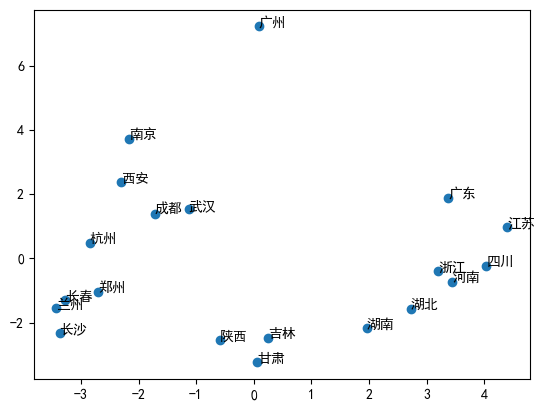

In [6]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 加载模型
model = Word2Vec.load("./word2vec.model")

# 定义词汇列表
words = ['江苏', '南京', '成都', '四川', '湖北', '武汉', '河南', '郑州', '甘肃', '兰州', '湖南', '长沙', 
         '陕西', '西安', '吉林', '长春', '广东', '广州', '浙江', '杭州']

# 获取词向量
word_vectors = np.array([model.wv[word] for word in words])

# 使用PCA进行降维
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

# 创建一个散点图
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()